# Project description

You've been given with dataset of an online store. Your task is to analyze the store's product range. 

You have to create your own plan of actions (decomposition) and complete the project recording your plan. The project must include:
- Analysis of the product range
- Formulating and testing statistical hypotheses
- Creating dashboard and presentation

# Description of the data

- **InvoiceNo** - order number
- **StockCode** - id of the products
- **Description** - description of the product
- **Quantity** - number of products with the id in an order
- **InvoiceDate** - date of purchase
- **UnitPrice** - price of 1 item
- **CustomerID** - user id

## Table of Contents <a class="anchor" id="0-bullet"></a>

[Decomposition](#1-bullet)

[Part 1: Data preprocessing](#2-bullet)

[Part 2:  Exploratory data analysis](#3-bullet)

[Part 3: Testing hypotheses](#4-bullet)

[Part 4: Working with business metrics and indicators](#5-bullet)

[Part 5: Creating Dashboard](#6-bullet)

[Part 6: Preparing Presentation](#7-bullet)

[Requirements](#8-bullet)

-----------

# Decomposition <a class="anchor" id="1-bullet"></a>

Let's first take a look on the data:

In [1]:
import pandas as pd

try:
    data = pd.read_csv('ecommerce_dataset_us.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


According to the data, the project will contain the following stages:

## 1) Data preprocessing

- Study missing values
- Study type correspondence
- Study duplicate values
- Check the correctness of column names
- Rename the columns
- Remove duplicates
- Convert types
- Replace missing values

## 2) Exploratory data analysis

- Study the time period of the data
- Study the qualitative metrics
- Study the mean values and standard deviation of quantitive metrics (use the describe() method).
- Plot bar histograms and distributions
- Define products categories
- Define which products are more often sold by themselves, and which ones are more often combined with others: main and additional assortment?
- Define what bundles of product groups are often present in shopping carts? For example, the category "houseplants" can often be accompanied by "mineral fertilizers"

## 3) Testing hypotheses

- The average revenue from products that are more often sold by themselves and ones that are more often combined with others differs.
- The average revenue of goods in category “else” is different from the average revenue of goods in other categories.

## 4) Working with business metrics and indicators

- Total revenue of a given period of time
- Average revenue per user (ARPPU)
- Average Order Value
- LTV
- Number of orders during a given period of time
- Number of daily/weekly/monthly unique buyers (DAU/WAU/MAU)

## 5) Creating dashboard

1.	Plot a diagram showing the number of purchases per day
2.	Add an indicator for the number of customers
3.	Add a purchase date filter

## 6) Preparing presentation

Presentation on the basis of business metrics values and graphs from dashboard with the main conclusions

[Back to table of contents](#0-bullet)

----------

# Part 1: Data preprocessing <a class="anchor" id="2-bullet"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

try:
    data = pd.read_csv('ecommerce_dataset_us.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


**Conclusions:**
- we need to rename columns' names to make them easier to understand
- we have missing data in Description and CustomerID columns
- we need to change the data type for InvoiceNo (to integer), InvoiceDate (to datetime) and CustomerID (to integer)

First of all let's rename the colums:

In [4]:
data.columns = ['order_id','unit_id','description','amount','order_dt', 'unit_price', 'user_id']
data.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


Now let's get rid of the missing values:

In [5]:
data.isnull().sum()

order_id            0
unit_id             0
description      1454
amount              0
order_dt            0
unit_price          0
user_id        135080
dtype: int64

Missing values:
- **description** - 1454 - We will restore description with the appropriate stock_codes.
- **user_id** - 135080 - we will define that users as "unidentified" and calculate the average order for unidentified users to see how it differs from the rest customers since we have no basis to take their ids from.

Let's start with descriptions since we don't need to change the data type of this column:

In [6]:
# for each unique unit_id we find the most common description 
# and fill with it all the descriptions of this unit_id

for code in data['unit_id'].unique():
    if len(data.query('unit_id in @code')['description'].value_counts()) == 0:
        most_common_description = 'no description'
    else:
        most_common_description = data.query('unit_id in @code')['description'].value_counts().keys()[0]
    data['description'][data['unit_id'] == code] = most_common_description

data.isnull().sum()

#it takes near 7 minutes wating

order_id            0
unit_id             0
description         0
amount              0
order_dt            0
unit_price          0
user_id        135080
dtype: int64

In [7]:
data.query('description in "no description"').head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id
1970,536545,21134,no description,1,11/29/2018 14:32,0.0,NaN
1987,536549,85226A,no description,1,11/29/2018 14:34,0.0,NaN
1988,536550,85044,no description,1,11/29/2018 14:34,0.0,NaN
2024,536552,20950,no description,1,11/29/2018 14:34,0.0,NaN
2026,536554,84670,no description,23,11/29/2018 14:35,0.0,NaN


In [8]:
len(data.query('description in "no description"'))

112

There is onlly 112 "no description" items here. Let's continue with user_id. Since we will change the data types after that we will do the following actions: 

1) We will find the user_id that doesn't exist

2) Replace NaNs with this value

3) Change the data type into integer (and all other data types needed at the same opportunity)

4) Replace our "fake" user id with 'unidentified':

In [9]:
# trying fake 112233 user_id
data.query('user_id == 112233')

,order_id,unit_id,description,amount,order_dt,unit_price,user_id


In [10]:
# we didn't get any results which means that it is fine for us
# now we replace NaNs with this

data['user_id'].fillna(112233, inplace = True)

# check
print(data.isnull().sum())
print()
data.query('user_id == 112233').head()

order_id       0
unit_id        0
description    0
amount         0
order_dt       0
unit_price     0
user_id        0
dtype: int64



,order_id,unit_id,description,amount,order_dt,unit_price,user_id
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,11/29/2018 11:52,0.00,112233.0
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,112233.0
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,112233.0
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,112233.0
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,112233.0


In [11]:
# changing data type

data['order_dt'] = pd.to_datetime(data['order_dt'])
data['user_id'] = data['user_id'].astype('int')

# check
data.info()
print()
data.query('user_id == 112233').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     541909 non-null  object        
 1   unit_id      541909 non-null  object        
 2   description  541909 non-null  object        
 3   amount       541909 non-null  int64         
 4   order_dt     541909 non-null  datetime64[ns]
 5   unit_price   541909 non-null  float64       
 6   user_id      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 26.9+ MB



,order_id,unit_id,description,amount,order_dt,unit_price,user_id
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2018-11-29 11:52:00,0.00,112233
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,112233
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,112233
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,112233
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,112233


Two words about the data types that we didn't change (since they have values with letters like 'C536379'):

- **unit_id letters** are usually at the beginning, they can mean product size, color or anything that will help to identify the product. 
- **order_id letters**, letters are added for organizational matters, it doesn't affect our analysis (by the data description of the company)

In [12]:
# replacing our "fake" user id with 'unidentified'

data['user_id'][data['user_id'] == 112233] = 'unidentified'

#check

print(data.query('user_id == 112233').head())
print()
data.query('user_id in "unidentified"').head()

Empty DataFrame
Columns: [order_id, unit_id, description, amount, order_dt, unit_price, user_id]
Index: []



,order_id,unit_id,description,amount,order_dt,unit_price,user_id
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2018-11-29 11:52:00,0.00,unidentified
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,unidentified
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,unidentified
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,unidentified
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,unidentified


No more missing values, no more wrong data types. It remains only to check duplicates:

In [13]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536639 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     536639 non-null  object        
 1   unit_id      536639 non-null  object        
 2   description  536639 non-null  object        
 3   amount       536639 non-null  int64         
 4   order_dt     536639 non-null  datetime64[ns]
 5   unit_price   536639 non-null  float64       
 6   user_id      536639 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.8+ MB


We droped 5270 rows of 541909. Less then 1%, it's fine. We can finish preprocessing part here.

**PART 1 Conclusion:**

- We renamed columns' names to make them easier to understand
- We replaced missing data in Description (with the most common description according to the stock code) and CustomerID columns (with 'unidentified')
- We changed the data type for InvoiceDate (to datetime) and CustomerID (to integer) and explaindes why we didn't do it for InvoiceNo
- We erased 5270 rows of duplicated data

[Back to table of contents](#0-bullet)

-----

# Part 2:  Exploratory data analysis <a class="anchor" id="3-bullet"></a>

Let's take a look of the time period of the data:

In [14]:
print('First data date:', data['order_dt'].min(), '\n')
print('Last data date:',data['order_dt'].max(), '\n')
print('Date period:',data['order_dt'].max() - data['order_dt'].min())

First data date: 2018-11-29 08:26:00 

Last data date: 2019-12-07 12:50:00 

Date period: 373 days 04:24:00


Now we will study the qualitative metrics and the mean values and standard deviation of quantitive metrics:

In [15]:
print('Number of unique goods:', data['description'].nunique())

Number of unique goods: 3820


In [16]:
for column in data.columns.drop('description'):
    print(column, '\n')
    print(data[column].describe(), '\n')
    print('************')

order_id 

count     536639
unique     25900
top       573585
freq        1114
Name: order_id, dtype: object 

************
unit_id 

count     536639
unique      4070
top       85123A
freq        2301
Name: unit_id, dtype: object 

************
amount 

count    536639.000000
mean          9.619500
std         219.130206
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: amount, dtype: float64 

************
order_dt 

count                  536639
unique                  23260
top       2019-10-29 14:41:00
freq                     1114
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: order_dt, dtype: object 

************
unit_price 

count    536639.000000
mean          4.632660
std          97.233299
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64 

************
user_id 

count           536639
uni

Anomalies that catch our eyes: **amount** and **unit_price** columns have 0 and negative values and outliars that are needed to be erased. Let's take more detailed look on it:

Distribution of values in amount column 

Number of negative values: 10587 

Number of 0-values: 0 



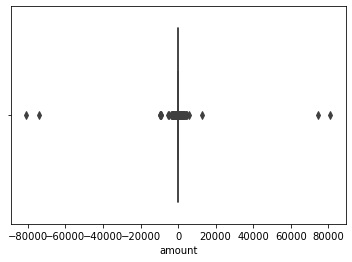

************
Distribution of values in unit_price column 

Number of negative values: 2 

Number of 0-values: 2510 



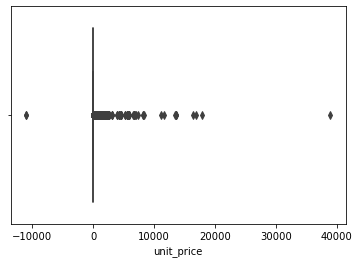

************


In [17]:
for column in ['amount', 'unit_price']:
    print('Distribution of values in', column, 'column', '\n')
    print('Number of negative values:', len(data[data[column] < 0]), '\n')
    print('Number of 0-values:', len(data[data[column] == 0]), '\n')
    sns.boxplot(data[column])
    plt.show()
    print('************')

**The negative values of amount column** are cancelled orders. We should analyze them separately and make suggestions  what our customer should pay attention to ( most common cancelled items). 

**The negative values and 0-values of unit_price column** are adjusted bad debt for bookkeeping. We will take a look at the description of the product after defining products categories.

Our plan for now is to extract the separate words from the descriptions, count them as list of the most popular and on the basis of it create categories:

In [18]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
data['description'] = data['description'].str.lower()
data['lemmatized'] = data['description'].apply(lemmatize_text)
data.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,"[white, hanging, heart, t-light, holder]"
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,"[white, metal, lantern]"
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,"[cream, cupid, heart, coat, hanger]"
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,"[knitted, union, flag, hot, water, bottle]"
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,"[red, woolly, hottie, white, heart.]"


In [20]:
from collections import Counter
frequencies = Counter(word for sentence in data['lemmatized'] for word in sentence)

for word, frequency in frequencies.most_common(30):  # get the 30 most frequent words
    print(word, frequency)

set 53608
of 52875
bag 51909
heart 43411
red 43114
retrospot 34905
vintage 34812
design 30219
pink 29875
box 27601
christmas 24882
cake 22640
jumbo 21016
metal 20721
white 20715
blue 19555
lunch 18295
3 17909
sign 16932
hanging 16886
holder 16341
tin 16270
card 16244
pack 15523
t-light 14641
decoration 14623
paper 14251
small 13640
6 13024
wooden 12660


When we visit an online shop there just few categories in there so let's create something like 10-20 categories:

In [21]:
#ists of words for each category

vintage = ['vintage','antique','victorian','retrospot','traditional','retro','classic']
bags = ['bag', 'shopper']
design = ['design']
box = ['box']
christmas = ['christmas']
holders = ['holder','case','kit']
assorted_goods = ['assorted']
decoration = ['decoration','ribbon','wrap','frame','candle','feltcraft','glitter','craft']
home = ['home','garden','clock','wall','doormat','lantern','door','cabinet','toilet','mug',
        'bathroom','bath','cushion','light','flower','mirror','bedroom','photo']
ceramic = ['ceramic']
party_and_birthday = ['party', 'birthday']
kitchen = ['kitchen','bowl','jar','cup','bottle','pantry','tea','tin','lunch','cake','napkins',
           'coffee','apron','jug','bread','cream','picnic','plate','dish']
children = ['childrens','girl','heart','card','toy','magic','alphabet']
sets = ['set','pack','bundle']
chancellery = ['pencil','pen','draw','marker','paint','scissor','notebook','sketchbook','magnet',
               'ruler','stencil','chalkboard']
signs = ['sign']
colored = ['pink','blue','white','red','polkadot','polka','black','green','multicolour']

total_categories = {
    'vintage': vintage, 
    'bags' : bags, 
    'design' : design, 
    'box' : box, 
    'christmas' : christmas, 
    'holders & cases' : holders, 
    'assorted goods' : assorted_goods, 
    'decoration' : decoration, 
    'home & garden' : home, 
    'ceramic' : ceramic,
    'party & birthday' : party_and_birthday,
    'kitchen & dishes' : kitchen,
    'children' : children,
    'sets' : sets,
    'chancellery' : chancellery,
    'signs' : signs,
    'colored goods' : colored
}

In [22]:
def to_clear_category(lemmas):
    for category_list in total_categories:
        if len(set(lemmas).intersection(set(total_categories[category_list]))) > 0:
            return category_list
        else:
            continue

In [23]:
data['clear_category'] = data['lemmatized'].apply(to_clear_category)
data.sample(5)

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category
72815,542268,85124B,blue juicy fruit photo frame,6,2019-01-25 08:30:00,2.55,15358,"[blue, juicy, fruit, photo, frame]",decoration
305085,563626,21415,clam shell small,12,2019-08-16 10:31:00,2.10,16187,"[clam, shell, small]",None
106182,545315,21253,set of picture frame stickers,1,2019-02-27 14:14:00,5.79,unidentified,"[set, of, picture, frame, sticker]",decoration
328239,565766,22222,cake plate lovebird white,1,2019-09-04 14:23:00,4.95,17841,"[cake, plate, lovebird, white]",kitchen & dishes
337678,566451,51014A,"feather pen,hot pink",12,2019-09-10 16:14:00,0.39,18069,"[feather, pen,hot, pink]",colored goods


In [24]:
print(data['clear_category'].value_counts())

vintage             87262
home & garden       58640
kitchen & dishes    56459
decoration          40311
bags                35967
children            34984
holders & cases     26959
sets                22778
colored goods       21789
box                 21740
design              19680
christmas           15995
signs               10854
chancellery         10724
party & birthday     9580
assorted goods       6271
ceramic              5488
Name: clear_category, dtype: int64


In [25]:
data.isna().sum()

order_id              0
unit_id               0
description           0
amount                0
order_dt              0
unit_price            0
user_id               0
lemmatized            0
clear_category    51158
dtype: int64

The missing values that we see here are caused by descriptions that don't have any intersection with our lists of the most popular words. We will replace them with 'else' creating another one category

In [26]:
data['clear_category'] = data['clear_category'].fillna('else')

In [27]:
data.isna().sum()

order_id          0
unit_id           0
description       0
amount            0
order_dt          0
unit_price        0
user_id           0
lemmatized        0
clear_category    0
dtype: int64

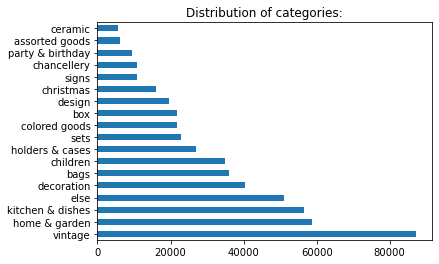

In [28]:
data['clear_category'].value_counts().plot.barh()
plt.title('Distribution of categories:')
plt.show()

"else" category takes less then 10% of data which is fine for us. Now we can come back to our negative values:

In [29]:
cancelled_orders = data[data['amount'] < 0]

adjusted_debts = data[data['unit_price'] <= 0]

Let's now take a look at most common canceled categories:

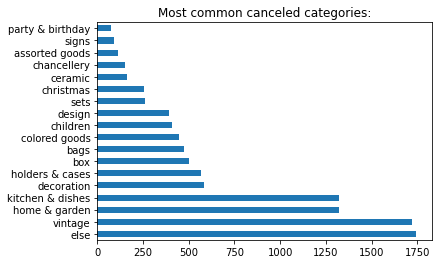

In [30]:
cancelled_orders['clear_category'].value_counts().plot.barh()
plt.title('Most common canceled categories:')
plt.show()

We can also define users that cancel their orders the most:

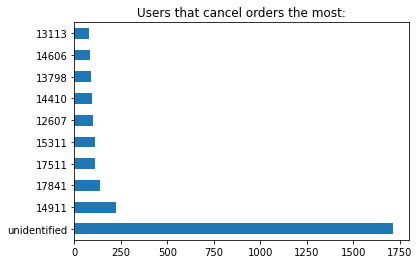

In [31]:
cancelled_orders['user_id'].value_counts().head(10).plot.barh()
plt.title('Users that cancel orders the most:')
plt.show()

Our "unidentified" users is our biggest problem. Maybe they created the profile by mistake or forgot to pay? What is for other users - our customers survice can contact them - maybe their lack of satisfaction is not based on the products or web site but the post survice prices for example. We can take them a special discount and decrease ammount of canceled orders.

Now it's time for adjusted debts:

In [32]:
adjusted_debts.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category
622,536414,22139,retrospot tea set ceramic 11 pc,56,2018-11-29 11:52:00,0.0,unidentified,"[retrospot, tea, set, ceramic, 11, pc]",vintage
1970,536545,21134,no description,1,2018-11-29 14:32:00,0.0,unidentified,"[no, description]",else
1971,536546,22145,christmas craft heart stocking,1,2018-11-29 14:33:00,0.0,unidentified,"[christmas, craft, heart, stocking]",christmas
1972,536547,37509,new england mug w gift box,1,2018-11-29 14:33:00,0.0,unidentified,"[new, england, mug, w, gift, box]",box
1987,536549,85226A,no description,1,2018-11-29 14:34:00,0.0,unidentified,"[no, description]",else


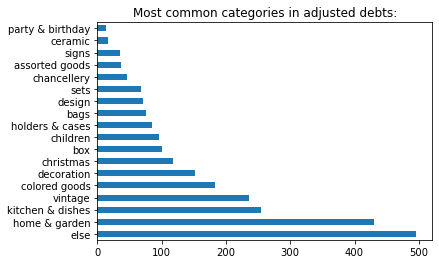

In [33]:
adjusted_debts['clear_category'].value_counts().plot.barh()
plt.title('Most common categories in adjusted debts:')
plt.show()

In [34]:
adjusted_debts['description'].value_counts().head(10)

no description                   112
rabbit night light                16
folkart heart napkin rings        13
jumbo bag owls                    11
picnic basket wicker large        10
french blue metal door sign 1      9
paper chain kit empire             9
owl doorstop                       8
hot baths metal sign               8
french blue metal door sign 8      8
Name: description, dtype: int64

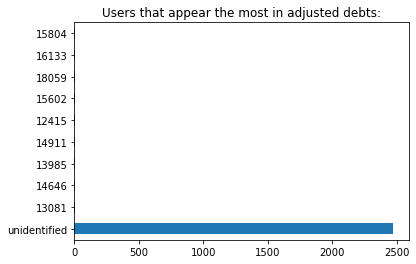

In [35]:
adjusted_debts['user_id'].value_counts().head(10).plot.barh()
plt.title('Users that appear the most in adjusted debts:')
plt.show()

We see here absolutelly the same picture - categories home & garden, else kitchen & dishes, vintage are our leaders both in most common canceled categories and most common categories in adjusted debts but they are the biggest categories so in terms of percentage it should be fine. Talking about percentage - we see that all 112 "no description" goods are in our adjusted debts.

Unidentified users are still our biggest problem. Let's take a look at them:

In [36]:
unidentified_users = data.query('user_id in "unidentified"')
unidentified_users.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category
622,536414,22139,retrospot tea set ceramic 11 pc,56,2018-11-29 11:52:00,0.00,unidentified,"[retrospot, tea, set, ceramic, 11, pc]",vintage
1443,536544,21773,decorative rose bathroom bottle,1,2018-11-29 14:32:00,2.51,unidentified,"[decorative, rose, bathroom, bottle]",home & garden
1444,536544,21774,decorative cats bathroom bottle,2,2018-11-29 14:32:00,2.51,unidentified,"[decorative, cat, bathroom, bottle]",home & garden
1445,536544,21786,polkadot rain hat,4,2018-11-29 14:32:00,0.85,unidentified,"[polkadot, rain, hat]",colored goods
1446,536544,21787,rain poncho retrospot,2,2018-11-29 14:32:00,1.66,unidentified,"[rain, poncho, retrospot]",vintage


In [37]:
unidentified_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135037 entries, 622 to 541540
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        135037 non-null  object        
 1   unit_id         135037 non-null  object        
 2   description     135037 non-null  object        
 3   amount          135037 non-null  int64         
 4   order_dt        135037 non-null  datetime64[ns]
 5   unit_price      135037 non-null  float64       
 6   user_id         135037 non-null  object        
 7   lemmatized      135037 non-null  object        
 8   clear_category  135037 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 10.3+ MB


In [38]:
for column in unidentified_users.columns.drop(['description', 'order_dt', 'user_id', 'lemmatized']):
    print(column, '\n')
    print(unidentified_users[column].describe(), '\n')
    print('************')

order_id 

count     135037
unique      3710
top       573585
freq        1114
Name: order_id, dtype: object 

************
unit_id 

count     135037
unique      3810
top          DOT
freq         694
Name: unit_id, dtype: object 

************
amount 

count    135037.000000
mean          1.996868
std          66.705155
min       -9600.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5568.000000
Name: amount, dtype: float64 

************
unit_price 

count    135037.000000
mean          8.078342
std         151.924958
min      -11062.060000
25%           1.630000
50%           3.290000
75%           5.490000
max       17836.460000
Name: unit_price, dtype: float64 

************
clear_category 

count      135037
unique         18
top       vintage
freq        20061
Name: clear_category, dtype: object 

************


We still have negative values here. Let's buid their distributions:

Distribution of values in amount column among unidentified users 

Number of negative values: 1715 

Number of 0-values: 0 



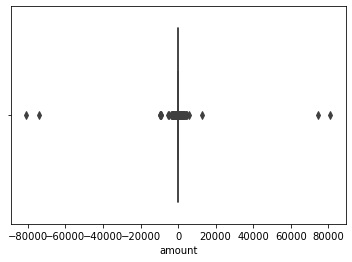

************
Distribution of values in unit_price column among unidentified users 

Number of negative values: 2 

Number of 0-values: 2470 



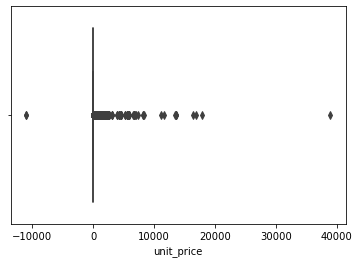

************


In [39]:
for column in ['amount', 'unit_price']:
    print('Distribution of values in', column, 'column among unidentified users', '\n')
    print('Number of negative values:', len(unidentified_users[unidentified_users[column] < 0]), '\n')
    print('Number of 0-values:', len(unidentified_users[unidentified_users[column] == 0]), '\n')
    sns.boxplot(data[column])
    plt.show()
    print('************')

We see that the ammount of negative values in amount column among unidentified users is 1715 which is 16.2% of this ammount among all users (10587) but negative and 0 values of unit_price column among unidentified users is 98% of this ammount among all users (2470 of 2510)

There is one more things that catch the eye - we payed attention only to negative values but there are also positive outliars - orders with ammounts more then 10000 and unit price more then 10000. Let's take a look:

Ammount of outliars in "unit price" column: 2 



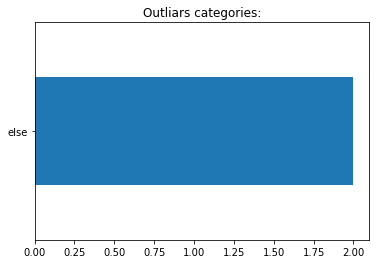

In [40]:
print('Ammount of outliars in "unit price" column:', len(data.query('unit_price > 10000 & amount > 0')), '\n')
data.query('unit_price > 10000 & amount > 0')['clear_category'].value_counts().plot.barh()
plt.title('Outliars categories:')
plt.show()

In [41]:
data.query('unit_price > 10000 & amount > 0').head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category
15017,537632,AMAZONFEE,amazon fee,1,2018-12-05 15:08:00,13541.33,unidentified,"[amazon, fee]",else
299982,A563185,B,adjust bad debt,1,2019-08-10 14:50:00,11062.06,unidentified,"[adjust, bad, debt]",else


Ammount of outliars in "mount" column: 2 



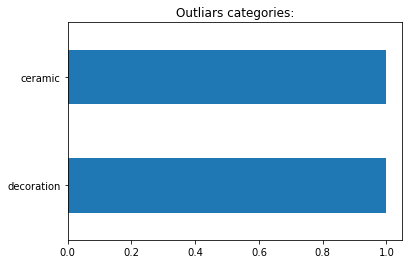

In [42]:
print('Ammount of outliars in "mount" column:', len(data.query('amount > 10000 & unit_price > 0')), '\n')
data.query('amount > 10000 & unit_price > 0')['clear_category'].value_counts().plot.barh()
plt.title('Outliars categories:')
plt.show()

In [43]:
data.query('amount > 10000 & unit_price > 0').head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category
61619,541431,23166,medium ceramic top storage jar,74215,2019-01-16 10:01:00,1.04,12346,"[medium, ceramic, top, storage, jar]",ceramic
540421,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446,"[paper, craft, ,, little, birdie]",decoration


According to the categories, we suppose that these orders were wholesale for a company or another bed debts (decorations and ceramics could be broken). We can erase them since these orders take less then 1% of the whole data and they can affect on our results but since we need to find total revenue for the period in the business metrics part, we will do it here before erasing outliars.

In [44]:
data['revenue'] = data['amount'] * data['unit_price']
data.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category,revenue
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,"[white, hanging, heart, t-light, holder]",holders & cases,15.30
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,"[white, metal, lantern]",home & garden,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,"[cream, cupid, heart, coat, hanger]",kitchen & dishes,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,"[knitted, union, flag, hot, water, bottle]",kitchen & dishes,20.34
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,"[red, woolly, hottie, white, heart.]",colored goods,20.34


In [45]:
total_revenue = data['revenue'].sum()
print("Total revenue:", total_revenue)

Total revenue: 9725455.104000002


Now it's time to define which products are more often sold by themselves, and which ones are more often combined with others - main and additional assortment. Our plan is to find the orders with only 1 item in it and define the most popular categories sold as an only item as main assortment:

In [46]:
#erasing negavive values, 0 values and outliars
data = data.query('0 < amount < 10000 & 0 < unit_price < 10000')
data.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category,revenue
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,"[white, hanging, heart, t-light, holder]",holders & cases,15.30
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,"[white, metal, lantern]",home & garden,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,"[cream, cupid, heart, coat, hanger]",kitchen & dishes,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,"[knitted, union, flag, hot, water, bottle]",kitchen & dishes,20.34
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,"[red, woolly, hottie, white, heart.]",colored goods,20.34


In [47]:
orders_with_1item = data.groupby(['order_id'])['unit_id'].count().reset_index().query('unit_id < 2')
orders_with_1item.head()

,order_id,unit_id
4,536369,1
6,536371,1
9,536374,1
14,536380,1
25,536393,1


In [48]:
unique_1item = orders_with_1item['order_id'].unique()

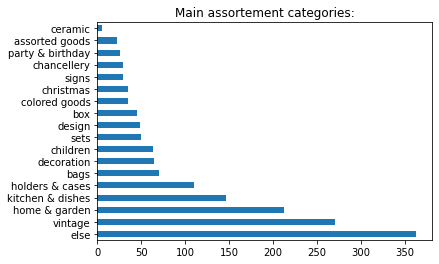

In [49]:
main_assortment = data.query('order_id in @unique_1item')
main_assortment['clear_category'].value_counts().plot.barh()
plt.title('Main assortement categories:')
plt.show()

We would call the most sold "else", "home & garden", "kitchen & dishes" and "vintage" categories as main assortment but these categories are the biggest in the whole data. So let's take a look at carts with additional assortment and after that find the percentages:

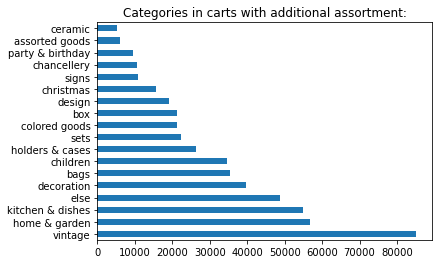

In [50]:
carts_with_additional_assortment = data.query('order_id not in @unique_1item')
carts_with_additional_assortment['clear_category'].value_counts().plot.barh()
plt.title('Categories in carts with additional assortment:')
plt.show()

These values don't give us the full picture since in we still have main assortment goods in carts_with_additional_assortment. Let's do the following - we will find percentage of the products that were bought in additional_assortment-carts. Then higher the percentage will be, then greater the probability that the category is bought as additional assortment:

In [51]:
AA = carts_with_additional_assortment['clear_category'].value_counts().reset_index()
Total = data.query('amount > 0 & unit_price > 0')['clear_category'].value_counts().reset_index()

additional_assortment = AA.merge(Total, on = 'index', suffixes=('_AA', '_Total'))
additional_assortment['percentage'] = additional_assortment['clear_category_AA'] / additional_assortment['clear_category_Total']
additional_assortment.sort_values(by = 'percentage', ascending = False)

,index,clear_category_AA,clear_category_Total,percentage
17,ceramic,5309,5314,0.999059
4,decoration,39624,39688,0.998387
9,colored goods,21228,21263,0.998354
6,children,34473,34536,0.998176
5,bags,35381,35451,0.998025
10,box,21149,21194,0.997877
8,sets,22432,22482,0.997776
12,christmas,15650,15685,0.997769
11,design,19189,19238,0.997453
2,kitchen & dishes,54846,54992,0.997345


The percentage results should be the closest to reality so **the main assortment** is in "else", "holders & cases", "home & garden", "assorted goods" and "vintage" categories while the **additional_assortment** is in "ceramic", "decoration", "colored goods", "children & toys" and "bags" categories.

It is time to define what are the budles of the products - which products are mostly bought together. Our plan here is to build correlation matrix on the basis of categories' presence in the shopping cards:

In [52]:
data_for_matrix = data[['order_id', 'clear_category']]

data_for_matrix['id'] = data_for_matrix.order_id
data_for_matrix_pivot = data_for_matrix.pivot_table(
            index = 'order_id',
            columns = 'clear_category',
            values = 'id',
            aggfunc = 'count',
            fill_value = 0).reset_index()
data_for_matrix_pivot.head()

clear_category,order_id,assorted goods,bags,box,ceramic,chancellery,children,christmas,colored goods,decoration,design,else,holders & cases,home & garden,kitchen & dishes,party & birthday,sets,signs,vintage
0,536365,0,0,1,0,0,0,0,1,0,0,0,2,1,2,0,0,0,0
1,536366,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,536367,1,0,2,0,0,0,0,0,1,0,1,0,4,1,0,0,0,2
3,536368,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0
4,536369,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


This table shows the ammounts of goods in each category in the product carts. Now we will replace all the values more then 1 to 1 to get boolean table of presense and build the correlation matrix

In [53]:
# we don't want to change order ids so we drop them from the list of columns
names_of_columns = data_for_matrix_pivot.columns.drop('order_id')
names_of_columns

Index(['assorted goods', 'bags', 'box', 'ceramic', 'chancellery', 'children',
       'christmas', 'colored goods', 'decoration', 'design', 'else',
       'holders & cases', 'home & garden', 'kitchen & dishes',
       'party & birthday', 'sets', 'signs', 'vintage'],
      dtype='object', name='clear_category')

In [54]:
for column in names_of_columns:
    data_for_matrix_pivot.loc[data_for_matrix_pivot[column] > 1, column] = 1

In [55]:
data_for_matrix_pivot.head()

clear_category,order_id,assorted goods,bags,box,ceramic,chancellery,children,christmas,colored goods,decoration,design,else,holders & cases,home & garden,kitchen & dishes,party & birthday,sets,signs,vintage
0,536365,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0
1,536366,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,536367,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1
3,536368,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,536369,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


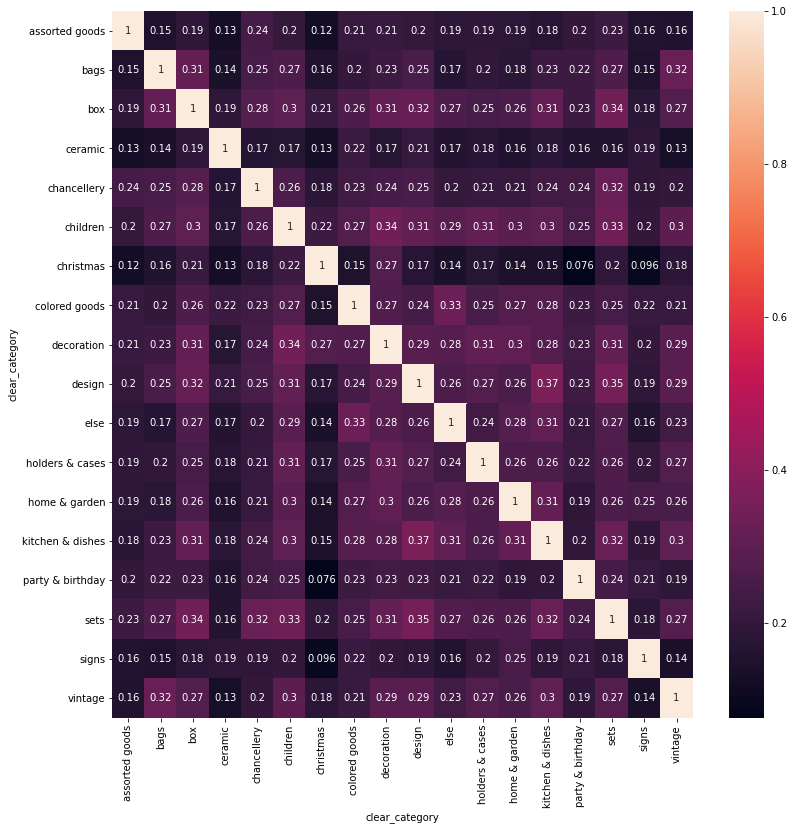

In [56]:
corrMatrix = data_for_matrix_pivot.corr()
size = (13, 13)
plt.subplots(figsize=size)
sns.heatmap(corrMatrix, annot=True)
plt.show()

This matrix is the matrix of presence since the values are boolean 1 and 0 and they define wheather a category takes place in a shopping card. The highest correlations here are:

- bags: box and vintage
- box: children, decoration, design, kitchen & dishes, sets
- chancellery: sets
- children: box, decoration, design, holders & cases, home & garden, kitchen & dishes, sets, vintage
- colored goods: else
- decoration: box, children, holders & cases, home & garden, sets
- design: box, children, home & garden, sets
- home & garden: kitchen & dishes


On the basis of these correlations we can create several bundles: 

- decorations and design things for children 
- holders for home & garden, kitchen & dishes
- decoration and boxes
- sets of different chancellery goods

**PART 2 Conclusion:**

- First data date: 2018-11-29 08:26:00, last data date: 2019-12-07 12:50:00, date period: 373 days 04:24:00

- Number of unique goods: 3821

- There are negative values of amount column which are cancelled orders and negative values and 0-values of unit_price column which are adjusted bad debt for bookkeeping. 

- There are 1454 missing values in description column which were replaced with most common description of the stock code or "no description"

- There are 135080 missing values in user_id column which were replaced with "unidentified" and analysed separetly

- We created categories of goods using categorisation using lemmatisation

- Analysis of most common canceled categories showed that "kitchen & dishes", "vintage", "home & garden" and "else" categories are canceled the most

- Analysis of most common categories in adjusted debts showed that the categories are the same as most common canceled categories - "kitchen & dishes", "vintage", "home & garden" and "else"

- We see that the ammount of negative values in amount column among unidentified users is 1715 which is 16.2% of this ammount among all users (10587) but negative and 0 values of unit_price column among unidentified users is 98% of this ammount among all users (2470 of 2510)

- We defined that the main assortment is in "else", "holders & cases", "home & garden", "assorted goods" and "vintage" categories while the additional_assortment is in "ceramic", "decoration", "colored goods", "children & toys" and "bags" categories.

- On the basis of the correlation matrix we can create several bundles: 

    - decorations and design things for children 
    - holders for home & garden, kitchen & dishes
    - decoration and boxes
    - sets of different chancellery goods


[Back to table of contents](#0-bullet)

-------------

# Part 3: Testing hypotheses <a class="anchor" id="4-bullet"></a>

### As for the test: never forget to check the distribution of your samples. Here your data is note distributed normally, so please think whether you can justify t-test here. That's all from my side, we're almost there) Can't wait for your presentation!

We saw that the ammounts of products that are more often sold by themselves is less then ones that are more often combined with others so we expect that the average revenue form this two categories will be different. To prove or refute it we will do a statistical test.Here we will use 2 hypothesis:

- **H0:** the average revenues of the proportions are equal.
- **H1:** the average revenues of the proportions are **not** equal.

We will check both hypothesis for alpha values 0.05 and 0.01. On the previous step we defined what are the main and additional assortement goods. Let's create arrays with the names of categories:

In [57]:
# the dataset we got on the previous step
additional_assortment.sort_values(by = 'percentage', ascending = False)

,index,clear_category_AA,clear_category_Total,percentage
17,ceramic,5309,5314,0.999059
4,decoration,39624,39688,0.998387
9,colored goods,21228,21263,0.998354
6,children,34473,34536,0.998176
5,bags,35381,35451,0.998025
10,box,21149,21194,0.997877
8,sets,22432,22482,0.997776
12,christmas,15650,15685,0.997769
11,design,19189,19238,0.997453
2,kitchen & dishes,54846,54992,0.997345


In [58]:
additional_assortment_categories = additional_assortment.sort_values(by = 'percentage', ascending = False)['index'].head(9).to_list()
additional_assortment_categories

['ceramic',
 'decoration',
 'colored goods',
 'children',
 'bags',
 'box',
 'sets',
 'christmas',
 'design']

In [59]:
main_assortment_categories = additional_assortment.sort_values(by = 'percentage', ascending = False)['index'].tail(9).to_list()
main_assortment_categories

['kitchen & dishes',
 'signs',
 'party & birthday',
 'chancellery',
 'vintage',
 'assorted goods',
 'home & garden',
 'holders & cases',
 'else']

Now we will form the samples:

In [60]:
sample_1 = data.query('clear_category in @main_assortment_categories')['revenue']
sample_2 = data.query('clear_category in @additional_assortment_categories')['revenue']

Before we'll do the test, we need to check wheather the data distributed normally:

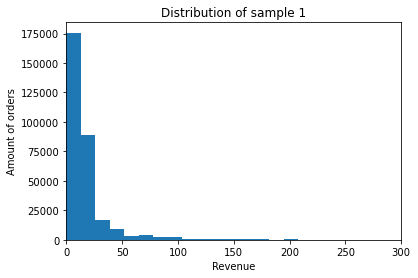

In [61]:
plt.hist(sample_1, bins = 3000)
plt.xlim(0,300)
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.title('Distribution of sample 1')
plt.show()

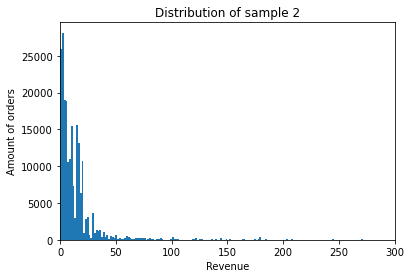

In [62]:
plt.hist(sample_2, bins = 3000)
plt.xlim(0,300)
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.title('Distribution of sample 2')
plt.show()

As we see the samples are not distributed normally. It means that we need to use Mann-Whitney test:

In [63]:
from scipy import stats as st

alpha = .05 #significance level

results = st.mannwhitneyu(sample_1, sample_2)
print('results: ', results)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

results:  MannwhitneyuResult(statistic=30016661020.5, pvalue=0.0)
p-value:  0.0
Null hypothesis rejected: the difference is statistically significant


In [64]:
alpha = .01 #significance level

results = st.mannwhitneyu(sample_1, sample_2)
print('results: ', results)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

results:  MannwhitneyuResult(statistic=30016661020.5, pvalue=0.0)
p-value:  0.0
Null hypothesis rejected: the difference is statistically significant


Another one thing that we want to check - if the average revenue of goods in category “else” is different from the average revenue of goods in other categories.

Here are our statistical hypotheses:
- **H0:** the average revenues of the proportions are equal.
- **H1:** the average revenues of the proportions are **not** equal.

We will check both hypothesis for alpha values 0.05 and 0.01 but firstly we again need to check he distributions:

In [65]:
sample_1 = data.query('clear_category in "else"')['revenue']
sample_2 = data.query('clear_category not in "else"')['revenue']

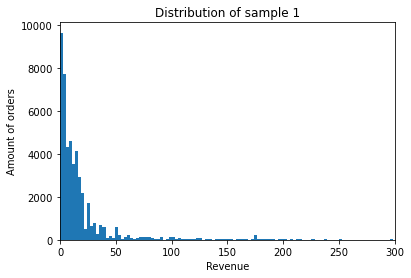

In [66]:
plt.hist(sample_1, bins = 3000)
plt.xlim(0,300)
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.title('Distribution of sample 1')
plt.show()

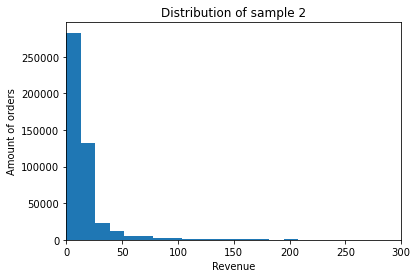

In [67]:
plt.hist(sample_2, bins = 3000)
plt.xlim(0,300)
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.title('Distribution of sample 2')
plt.show()

The same situation - the samples are not distributed normally and we need to use Mann-Whitney test:

In [68]:
alpha = .05 #significance level

results = st.mannwhitneyu(sample_1, sample_2)
print('results: ', results)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

results:  MannwhitneyuResult(statistic=11577826118.0, pvalue=2.9204192933881714e-05)
p-value:  2.9204192933881714e-05
Null hypothesis rejected: the difference is statistically significant


In [69]:
alpha = .01 #significance level

results = st.mannwhitneyu(sample_1, sample_2)
print('results: ', results)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

results:  MannwhitneyuResult(statistic=11577826118.0, pvalue=2.9204192933881714e-05)
p-value:  2.9204192933881714e-05
Null hypothesis rejected: the difference is statistically significant


**PART 3 Conclusion:**

As the result of the tests we rejected both H0 for both 0.05 and 0.01 alpha values - there is a statistical difference between both couples of samples

[Back to table of contents](#0-bullet)

----------

# Part 4: Working with business metrics and indicators <a class="anchor" id="5-bullet"></a>

- Total revenue of a given period of time
- Average revenue per user (ARPPU)
- Average Order Value
- LTV
- Number of orders during a given period of time
- Number of daily/weekly/monthly unique buyers (DAU/WAU/MAU)

In [70]:
# we've found this metric already before erasing the outliars
print("Total revenue:", total_revenue)

Total revenue: 9725455.104000002


In [71]:
print("Average revenue per user")
print()
data.groupby(['user_id']).agg({'revenue': ['mean']}).reset_index().head()

Average revenue per user



,user_id,revenue
,,mean
0,12347,23.681319
1,12348,57.975484
2,12349,24.076027
3,12350,19.670588
4,12352,29.482824


In [72]:
A = data.groupby(['order_id']).agg({'revenue': ['mean']}).reset_index()
print("Average Order Value:", A['revenue'].mean())

Average Order Value: mean    51.372534
dtype: float64


Number of daily/weekly/monthly unique buyers (DAU/WAU/MAU)

To calculate weekly and monthly activity, we'll first create separate columns for year, month, and week values.

In [73]:
data['session_year']  = data['order_dt'].dt.year
data['session_month'] = data['order_dt'].dt.month
data['session_week']  = data['order_dt'].dt.week
data['session_date'] = data['order_dt'].dt.date
data.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category,revenue,session_year,session_month,session_week,session_date
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,"[white, hanging, heart, t-light, holder]",holders & cases,15.30,2018,11,48,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,"[white, metal, lantern]",home & garden,20.34,2018,11,48,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,"[cream, cupid, heart, coat, hanger]",kitchen & dishes,22.00,2018,11,48,2018-11-29
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,"[knitted, union, flag, hot, water, bottle]",kitchen & dishes,20.34,2018,11,48,2018-11-29
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,"[red, woolly, hottie, white, heart.]",colored goods,20.34,2018,11,48,2018-11-29


Now let's calculate metrics. We'll group the data by session date/week and find the means:

In [74]:
dau_total = data.groupby('session_date').agg({'user_id': 'nunique'}).mean()
wau_total = data.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).mean()
mau_total = data.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total)) 
print(int(mau_total))

55
301
932


As we see here WAU is less then 7 DAU and MAU is less then 4 WAU

Calculating the ammount of sessions per day:

In [75]:
sessions_per_day = data.groupby(['session_date']).agg({'user_id': ['count','nunique']})
sessions_per_day = sessions_per_day.reset_index()
sessions_per_day.columns = ['session_date', 'n_sessions', 'n_users']
print(sessions_per_day.head()) 
print()
avg_sessions_per_day = len(data) / len(sessions_per_day)
print('Average ammount of sessions per day:', avg_sessions_per_day)

  session_date  n_sessions  n_users
0   2018-11-29        3028       96
1   2018-11-30        2022      100
2   2018-12-01        2138       51
3   2018-12-03        2603       76
4   2018-12-04        3768       83

Average ammount of sessions per day: 1720.8918032786885


Now let's calculate the sticky factor - this metric will tell us how loyal the audience is — how often they return:

In [76]:
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

print('General week sticky factor', sticky_wau)
print()
print('General month sticky factor', sticky_mau)

General week sticky factor user_id    18.554545
dtype: float64

General month sticky factor user_id    5.987354
dtype: float64


These values mean that 18.5% of users come back during 1st week and almost 6% of users come back during 1st month. 

In [77]:
dau_total = data.groupby('session_date').agg({'order_id': 'nunique'})
wau_total = data.groupby(['session_year', 'session_week']).agg({'order_id': 'nunique'})
mau_total = data.groupby(['session_year', 'session_month']).agg({'order_id': 'nunique'})

print('Number of orders per day', '\n')
print(dau_total.head(), '\n')
print('*********', '\n')
print('Number of orders per week', '\n')
print(wau_total.head(), '\n') 
print('*********', '\n')
print('Number of orders per month', '\n')
print(mau_total)

Number of orders per day 

              order_id
session_date          
2018-11-29         127
2018-11-30         142
2018-12-01          68
2018-12-03          88
2018-12-04         102 

********* 

Number of orders per week 

                           order_id
session_year session_week          
2018         48                 337
             49                 573
             50                 465
             51                 183
2019         1                  194 

********* 

Number of orders per month 

                            order_id
session_year session_month          
2018         11                  269
             12                 1289
2019         1                  1211
             2                  1079
             3                  1424
             4                  1189
             5                  1757
             6                  1488
             7                  1510
             8                  1426
             9                 

Let's take a look at distribution of revenue among the categories:

In [78]:
rev_dist = data.groupby('clear_category').sum()[['revenue']]
rev_dist = rev_dist.reset_index()

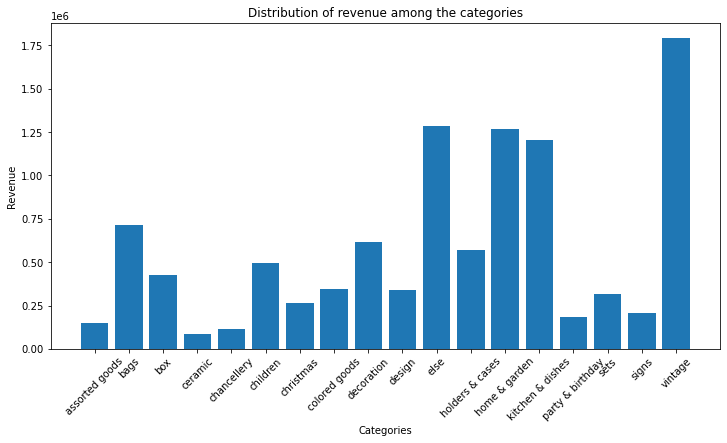

In [79]:
fig, ax = plt.subplots()

ax.bar(rev_dist['clear_category'], rev_dist['revenue'])
fig.set_figwidth(12)
fig.set_figheight(6) 
plt.title('Distribution of revenue among the categories')
plt.xlabel('Categories')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

As we see "vintage", "else" and "holders & cases" are our sales leaders but these values are absolute. Let's take a look at the mean revenue in each category:

In [80]:
rev_dist = data.groupby('clear_category').mean()[['revenue']]
rev_dist = rev_dist.reset_index()

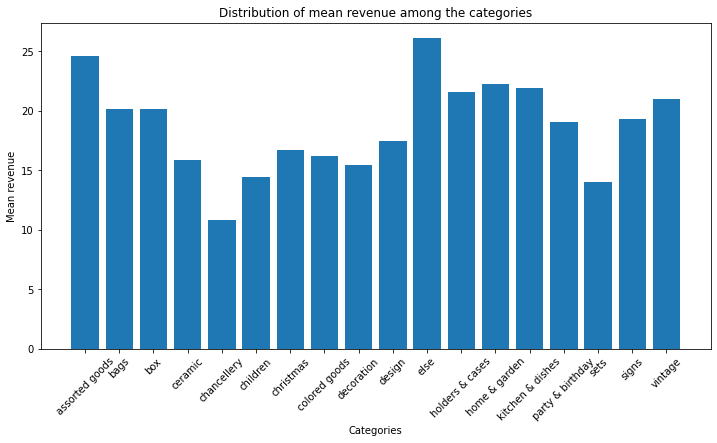

In [81]:
fig, ax = plt.subplots()

ax.bar(rev_dist['clear_category'], rev_dist['revenue'])
fig.set_figwidth(12)
fig.set_figheight(6) 
plt.title('Distribution of mean revenue among the categories')
plt.xlabel('Categories')
plt.ylabel('Mean revenue')
plt.xticks(rotation=45)
plt.show()

"else" and "holders & cases" are still in top-3 but not "vintage". Now number 2 is "assorted goods"which brings one of the least amount of money. 

Now Let's check if we have any seasoning in the data. We will group all the data by month and build a graph showing the revenue changes during the time:

In [82]:
# creating column with 1st day of month
data['order_month'] = data['session_date'].values.astype('datetime64[M]')
data.head(2)

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category,revenue,session_year,session_month,session_week,session_date,order_month
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,"[white, hanging, heart, t-light, holder]",holders & cases,15.30,2018,11,48,2018-11-29,2018-11-01
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,"[white, metal, lantern]",home & garden,20.34,2018,11,48,2018-11-29,2018-11-01


In [83]:
# grouping data
time_pivot = data.pivot_table(
            index = ['order_month'],
            columns = 'clear_category',
            values = 'amount',
            aggfunc = 'sum', #number of items
            fill_value = 0).reset_index()
time_pivot.head()

clear_category,order_month,assorted goods,bags,box,ceramic,chancellery,children,christmas,colored goods,decoration,design,else,holders & cases,home & garden,kitchen & dishes,party & birthday,sets,signs,vintage
0,2018-11-01,1078,1721,4564,579,944,2705,2689,2282,3784,4859,5268,6267,4685,3364,914,2959,477,8943
1,2018-12-01,8759,14974,14290,2795,6172,18524,13688,10567,22967,13420,26256,29820,21412,28957,3738,12171,5968,45458
2,2019-01-01,12296,23357,15586,3600,5756,29507,1494,10679,26634,14878,30676,25777,25445,29818,8437,14569,6929,52966
3,2019-02-01,7947,17158,10645,4184,9246,17537,671,8710,26444,20556,19327,22641,19057,25547,6097,16630,5347,40419
4,2019-03-01,11907,32976,16617,3207,10993,22487,518,12007,29361,17646,28767,28175,27440,32382,8086,25102,7692,58946


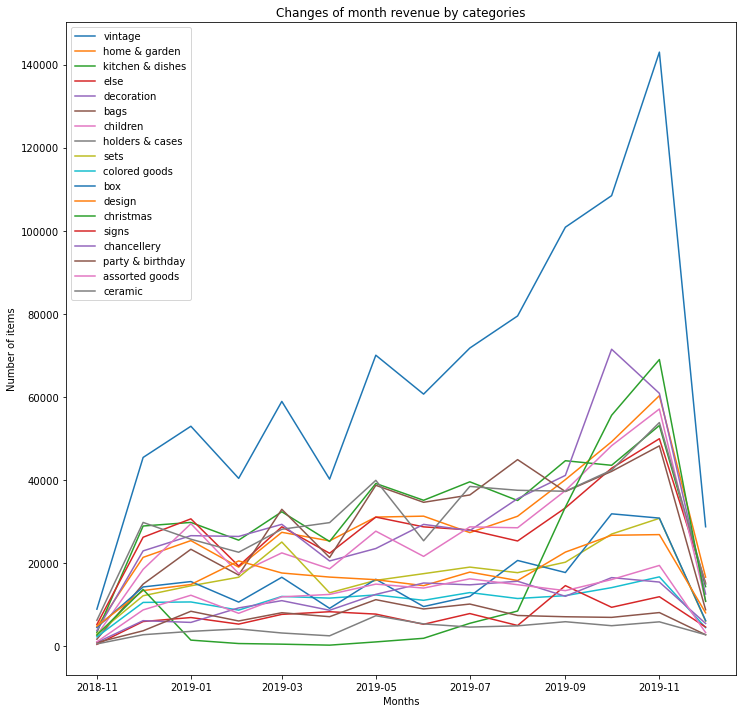

In [84]:
fig, ax = plt.subplots()

for i in data['clear_category'].value_counts().keys().tolist():
    ax.plot(time_pivot['order_month'], time_pivot[[i]], label=i)
    leg = ax.legend()
    
fig.set_figwidth(12)
fig.set_figheight(12) 
plt.title('Changes of month revenue by categories')
plt.ylabel('Number of items')
plt.xlabel('Months')
plt.show()

All the categories here had their better periods and worse periods but they all have the same tendency:
- in November 2018 all the revenues were extremely low
- in December 2018 the revenues rose and stayed approximately on the same level till May 2019
- in May 2019 we see another rise of the revenues that continued till the November 2019 where we have very significant rise
- in December 2019 we see hard total decline of revenues in all the categories

Talking about time, let's find the LTV. We have data for more then a year. It'll be best to make monthly cohorts. To do so we need to get the 1st month when each user made an order for the first time:

In [85]:
first_orders = data.groupby('user_id').agg({'order_month' : 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_month']
print(first_orders.head(10))

  user_id first_order_month
0   12347        2018-12-01
1   12348        2018-12-01
2   12349        2019-11-01
3   12350        2019-01-01
4   12352        2019-02-01
5   12353        2019-05-01
6   12354        2019-04-01
7   12355        2019-05-01
8   12356        2019-01-01
9   12357        2019-11-01


We'll also calculate the number of new customers (n_buyers) for each month:

In [86]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes 

,first_order_month,n_buyers
0,2018-11-01,189
1,2018-12-01,697
2,2019-01-01,471
3,2019-02-01,368
4,2019-03-01,425
5,2019-04-01,288
6,2019-05-01,297
7,2019-06-01,230
8,2019-07-01,203
9,2019-08-01,164


Let's build cohorts. We'll add customers' first-purchase months to the table of orders:

In [87]:
data_ = pd.merge(data,first_orders, on='user_id')
data_.head()

,order_id,unit_id,description,amount,order_dt,unit_price,user_id,lemmatized,clear_category,revenue,session_year,session_month,session_week,session_date,order_month,first_order_month
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,"[white, hanging, heart, t-light, holder]",holders & cases,15.30,2018,11,48,2018-11-29,2018-11-01,2018-11-01
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,"[white, metal, lantern]",home & garden,20.34,2018,11,48,2018-11-29,2018-11-01,2018-11-01
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,"[cream, cupid, heart, coat, hanger]",kitchen & dishes,22.00,2018,11,48,2018-11-29,2018-11-01,2018-11-01
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,"[knitted, union, flag, hot, water, bottle]",kitchen & dishes,20.34,2018,11,48,2018-11-29,2018-11-01,2018-11-01
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,"[red, woolly, hottie, white, heart.]",colored goods,20.34,2018,11,48,2018-11-29,2018-11-01,2018-11-01


Now we'll group the table of orders by month of first purchase and month of purchase and sum up the revenue

In [88]:
cohorts = data_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head(10)

,first_order_month,order_month,revenue
0,2018-11-01,2018-11-01,106406.21
1,2018-11-01,2018-12-01,309847.36
2,2018-11-01,2019-01-01,199221.20
3,2018-11-01,2019-02-01,123955.61
4,2018-11-01,2019-03-01,197660.44
5,2018-11-01,2019-04-01,114333.83
6,2018-11-01,2019-05-01,194967.25
7,2018-11-01,2019-06-01,162336.81
8,2018-11-01,2019-07-01,193939.80
9,2018-11-01,2019-08-01,194025.82


For purposes of cohort analysis, LTV is a cohort's cumulative revenue, accounting for the number of people in the cohort. Let's add data on how many users made their first purchases in each month to the cohorts table:

In [89]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

,first_order_month,n_buyers,order_month,revenue
0,2018-11-01,189,2018-11-01,106406.21
1,2018-11-01,189,2018-12-01,309847.36
2,2018-11-01,189,2019-01-01,199221.20
3,2018-11-01,189,2019-02-01,123955.61
4,2018-11-01,189,2019-03-01,197660.44


Earlier a column with new customers appeared in the table: n_buyers. The first five values in this column are the same, since they all concern the same cohort. Just two more steps and we'll have LTV. First, since LTV is calculated on the basis of gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability. Second, LTV is a relative parameter, and it's easier to study for "mature" cohorts, so let's make the columns show the cohort's age instead of the month of the order.

In [90]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,revenue,age
0,2018-11-01,189,2018-11-01,106406.21,0
1,2018-11-01,189,2018-12-01,309847.36,1
2,2018-11-01,189,2019-01-01,199221.20,2
3,2018-11-01,189,2019-02-01,123955.61,3
4,2018-11-01,189,2019-03-01,197660.44,4


To calculate LTV we'll divide the cohort's revenue for each month by the total number of users in each cohort:

In [91]:
report['ltv'] = report['revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output = output.cumsum(axis=1).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_order_month,,,,,,,,,,,,,,
2018-11-01,563.00,2202.4,3256.48,3912.33,4958.15,5563.09,6594.67,7453.59,8479.73,9506.32,10509.4,11814.8,14534.4,15283.3
2018-12-01,561.92,885.33,1139.99,1453.62,1669.09,2041.66,2372.98,2721.2,3120.1,3605.2,4119.11,4652.28,4796.59,
2019-01-01,505.66,621.88,771.38,932.22,1138.45,1310.41,1477.26,1654.46,1810.45,2078.19,2356.92,2401.29,,
2019-02-01,438.03,513.14,608.83,738.2,835.23,934.01,1058.59,1214.87,1357.35,1531.46,1546.16,,,
2019-03-01,429.28,492.65,637.93,728.92,850.91,954.73,1091.86,1266.33,1419.49,1439.3,,,,
2019-04-01,402.59,491.75,569.96,643.22,718.58,812.35,909.94,1020.14,1034.09,,,,,
2019-05-01,433.99,498.75,569.93,632.46,729.9,849.45,986.84,1003.8,,,,,,
2019-06-01,566.92,636.35,692.86,819.95,933.65,1106.11,1125.58,,,,,,,
2019-07-01,446.99,505.27,588.51,683.98,785.87,810.61,,,,,,,,


In [92]:
output = output.reset_index()

ltv_3rd_month = output[2].head(12).mean()
print('Average ltv by 3rd month:', ltv_3rd_month, '\n')
ltv_6th_month = output[5].head(9).mean()
print('Average ltv by 6th month:', ltv_6th_month, '\n')
ltv_9th_month = output[8].head(6).mean()
print('Average ltv by 9th month:',ltv_9th_month, '\n')
ltv_12th_month = output[11].head(3).mean()
print('Average ltv by the end of the 1st year:',ltv_12th_month)

Average ltv by 3rd month: 912.8900000000002 

Average ltv by 6th month: 1598.0466666666669 

Average ltv by 9th month: 2870.2016666666664 

Average ltv by the end of the 1st year: 6289.44


We see that in each cohort LTV is increasing from month to month, so the average LTV by 3rd month is 912.9, by 6th month - 1598 by 9th month - 2870.2 and by the end of the 1st year - 6289.44.

**PART 4 Conclusion:**

- Total revenue of the hole period of time: 9725455.104
- Average Order Value: 51.372534
- The numbers of daily, weekly and monthly unique buyers are 55, 301 and 932
- Average ammount of sessions per day: 1720.8918032786885
- General week sticky factor = 18.554545 and month sticky factor = 5.987354. These values mean that 18.5% of users come back during 1st week and almost 6% of users come back during 1st month.
- "vintage", "else" and "holders & cases" are our sales leaders in absolute values
- "else" and "holders & cases" are also in top-3 of the average category order but not "vintage". Now number 2 is "assorted goods"which brings one of the least amount of money.
- The graph of changes of month revenue by categories shows that all the categories here had their better periods and worse periods but they all have the same tendensy:
	- in November 2018 all the revenues were extremelly low
	- in December 2018 the revenues rose and stayed aproximatelly on the same level till May 2019
	- in May 2019 we see another rise of the revenues that continued till the November 2019 where we have very significant rise
	- in December 2019 we see hard total decline of revenues in all the categories
- The LTV is increasing from month to month, so the average LTV by 3rd month is 912.9, by 6th month - 1598 by 9th month - 2870.2 and by the end of the 1st year - 6289.44.

[Back to table of contents](#0-bullet)

-----------------

# Part 5: Creating Dashboard <a class="anchor" id="6-bullet"></a>

1.	Plot a diagram showing the number of purchases per day
2.	Add an indicator for the number of customers
3.	Add a purchase date filter

To build the dashboard we need to get the aggregated data and save it to a .csv file:

In [93]:
dashboard_data = data.groupby(['session_date']).agg({'order_id': ['nunique'], 'user_id': ['nunique']}).reset_index()
dashboard_data.columns = ['date','number of orders','number of users']
dashboard_data.head()

,date,number of orders,number of users
0,2018-11-29,127,96
1,2018-11-30,142,100
2,2018-12-01,68,51
3,2018-12-03,88,76
4,2018-12-04,102,83


In [94]:
dashboard_data.to_csv('dashboard_data.csv', index = False)

The dashboard can be found by the following link: https://public.tableau.com/profile/oren7426#!/vizhome/FinalProject-Numberofordersandusersperday/Numberofordersandusersperday?publish=yes

[Back to table of contents](#0-bullet)

------------

# Part 6: Preparing Presentation <a class="anchor" id="7-bullet"></a>

The dashboard can be found by the following link: https://drive.google.com/file/d/1G4lNatF79nh1QLjoKM_zWUz4Ce7n6OQb/view?usp=sharing

[Back to table of contents](#0-bullet)

----------

# Requirements <a class="anchor" id="8-bullet"></a>

In [95]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
